In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import regex as re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('punkt');
import re
from wordcloud import WordCloud, STOPWORDS 
import requests
from nltk.stem import WordNetLemmatizer
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import os

pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/raphael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/raphael/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/raphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AlisonIsAnArtist/Canadian-Healthcare-System/main/chs.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

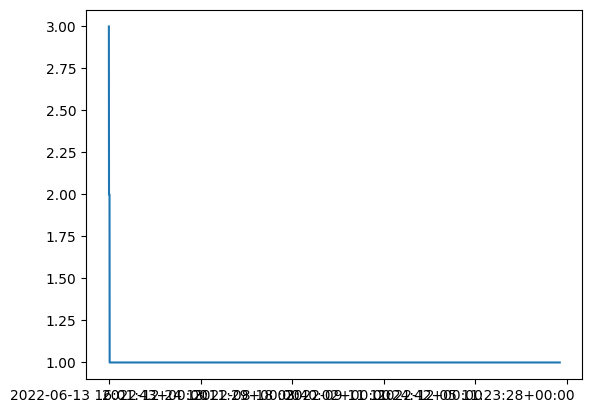

In [5]:
df['Date'].value_counts().plot()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9859 non-null   int64  
 1   ID              9859 non-null   float64
 2   Date            9859 non-null   object 
 3   User            9859 non-null   object 
 4   Tweet           9859 non-null   object 
 5   replyCount      9859 non-null   int64  
 6   lang            9859 non-null   object 
 7   Place           126 non-null    object 
 8   rendercontents  9859 non-null   object 
 9   Like_Count      9859 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 770.4+ KB


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df['Date'] =  pd.to_datetime(df['Date'])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 770.4+ KB


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2


In [10]:
df['Date'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2022-06-13 16:01:43+00:00    3
2023-02-11 14:01:42+00:00    2
2023-02-01 04:03:57+00:00    2
2022-07-22 03:19:10+00:00    2
2022-12-10 04:39:44+00:00    2
2023-01-13 10:54:43+00:00    2
2022-09-08 02:46:25+00:00    2
2023-01-26 23:24:54+00:00    2
2022-07-12 11:41:35+00:00    2
2022-02-19 17:10:21+00:00    2
2023-02-01 18:11:40+00:00    2
2022-12-30 17:27:36+00:00    2
2022-10-13 13:36:54+00:00    2
2022-12-27 16:39:58+00:00    2
2023-02-08 18:40:32+00:00    2
2023-01-18 15:37:57+00:00    1
2022-05-24 01:10:52+00:00    1
2022-09-22 05:59:51+00:00    1
2022-12-21 14:29:20+00:00    1
2022-12-16 07:26:16+00:00    1
2023-01-18 04:18:20+00:00    1
2022-02-17 23:34:20+00:00    1
2022-02-01 02:50:49+00:00    1
2022-10-30 00:28:21+00:00    1
2022-08-20 03:24:44+00:00    1
2022-08-13 13:03:31+00:00    1
2022-01-13 20:11:06+00:00    1
2022-09-16 00:53:25+00:00    1
2023-01-18 09:25:46+00:00    1
2022-11-16 15:05:59+00:00    1
2023-02-02 00:03:51+00:00    1
2022-05-12 00:47:12+00:00    1
2022-11-

In [11]:
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30


In [13]:
df['Dates'].value_counts()/len(df.Dates)*100

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/opt/anaconda3/lib/python3.8/site-packages/numexpr/expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
/opt/anaconda3/lib/python3.8/site-packages/pandas/compat/_optional.py:116: DeprecationWarning: distutils Version classes are d

2023-02-08    1.115732
2023-01-17    1.014302
2022-12-13    0.923015
2023-02-07    0.892585
2023-01-18    0.862156
2022-11-14    0.841870
2022-12-12    0.831727
2023-01-25    0.801298
2022-11-15    0.791155
2023-01-16    0.740440
2022-12-14    0.720154
2023-01-13    0.649153
2023-01-11    0.639010
2023-02-06    0.628867
2022-08-13    0.608581
2023-02-01    0.598438
2022-09-07    0.598438
2022-08-12    0.588295
2022-01-11    0.588295
2023-01-19    0.578152
2023-01-23    0.557866
2023-01-12    0.547723
2022-12-15    0.547723
2023-01-26    0.537580
2022-11-18    0.527437
2022-12-17    0.527437
2022-12-06    0.527437
2023-01-31    0.527437
2022-01-12    0.527437
2023-01-10    0.517294
2022-11-16    0.517294
2022-08-11    0.507151
2022-12-16    0.507151
2023-01-21    0.507151
2022-12-07    0.507151
2023-01-15    0.497008
2023-02-09    0.486865
2022-11-13    0.486865
2022-11-27    0.476722
2022-12-11    0.476722
2022-08-25    0.476722
2023-01-30    0.476722
2022-11-29    0.466579
2022-11-11 

In [14]:
# Create new columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
 10  Dates           9859 non-null   object             
 11  Time            9859 non-null   object             
 12  day             9859 non-null   int64              
 13  month           9859 non-null   i

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
df['year'].value_counts()/len(df.Dates)*100

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2022    80.403692
2023    19.596308
Name: year, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

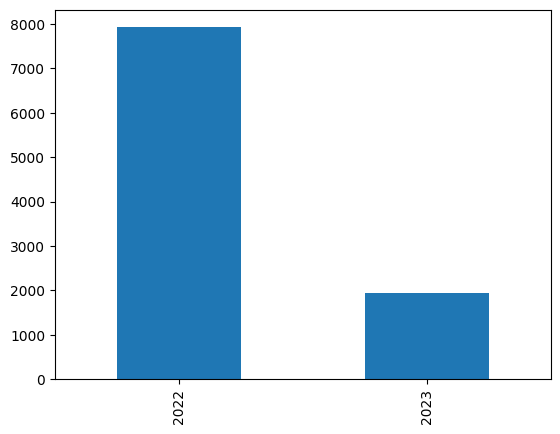

In [17]:
df['year'].value_counts().plot.bar()

In [18]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30,11,2,2023


In [19]:
df['Hashtags'] = df['Tweet'].str.findall(r'#.*?(?=\s|$)')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[]
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[]
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[]
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[]
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30,11,2,2023,[]


In [21]:
df['mentions'] = df['Tweet'].str.findall(r'[＠@]([^][\s#<>|{}]+)')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
df.head(20)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]"
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]"
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]"
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[]
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,2,2023-02-11,22:01:30,11,2,2023,[],[globalnews]
5,5,1.624520e+18,2023-02-11 21:38:55+00:00,JayneKimlee,"@my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatment they need,like MRI’s,and yet the system is always overloaded and needs more money, even though we pay ridiculous taxes here",1,en,NaN,"@my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatm

In [47]:
def remove_hashtags_usernames(tweet):
    # Use regex to match hashtags (starting with #) and usernames (starting with @)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    return tweet

cleaned_tweets = []
for tweet in df['Tweet']:
    cleaned_tweet = remove_hashtags_usernames(tweet)
    cleaned_tweet = re.sub('\W+',' ', cleaned_tweet )
    cleaned_tweets.append(cleaned_tweet)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence \W
<>:11: DeprecationWarning: invalid escape sequence \W
<ipython-input-47-fc047fb52dce>:11: DeprecationWarning: invalid escape sequence \W
  cleaned_tweet = re.sub('\W+',' ', cleaned_tweet )


In [66]:
df['cleaned_tweets'] = cleaned_tweets

comment_words = '' 
add_stop = ['https', 'rt', 'healthcare', 'system', 'canadian','canada','canadians','the','in','is','it','on','amp','us','a','i','u','s','dont','t','re','don','m','ve', 'i']
stopwords = set(list(STOPWORDS)+add_stop)  

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords)]))


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills,0.125,Positive
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc,0.160,Positive
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",no i said i trying canadian culture partner canadian escaping taxes third world cbc obvious hit piece anything liberal green ndp they afraid obscure quebec parties,-0.200,Negative
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[],wake people trudeaus spending left broke enough money one time one best world but hey lets keep voting narcissistic dictator nutjob back is every one brainwashed,0.250,Positive
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiti

In [68]:
for val in df['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


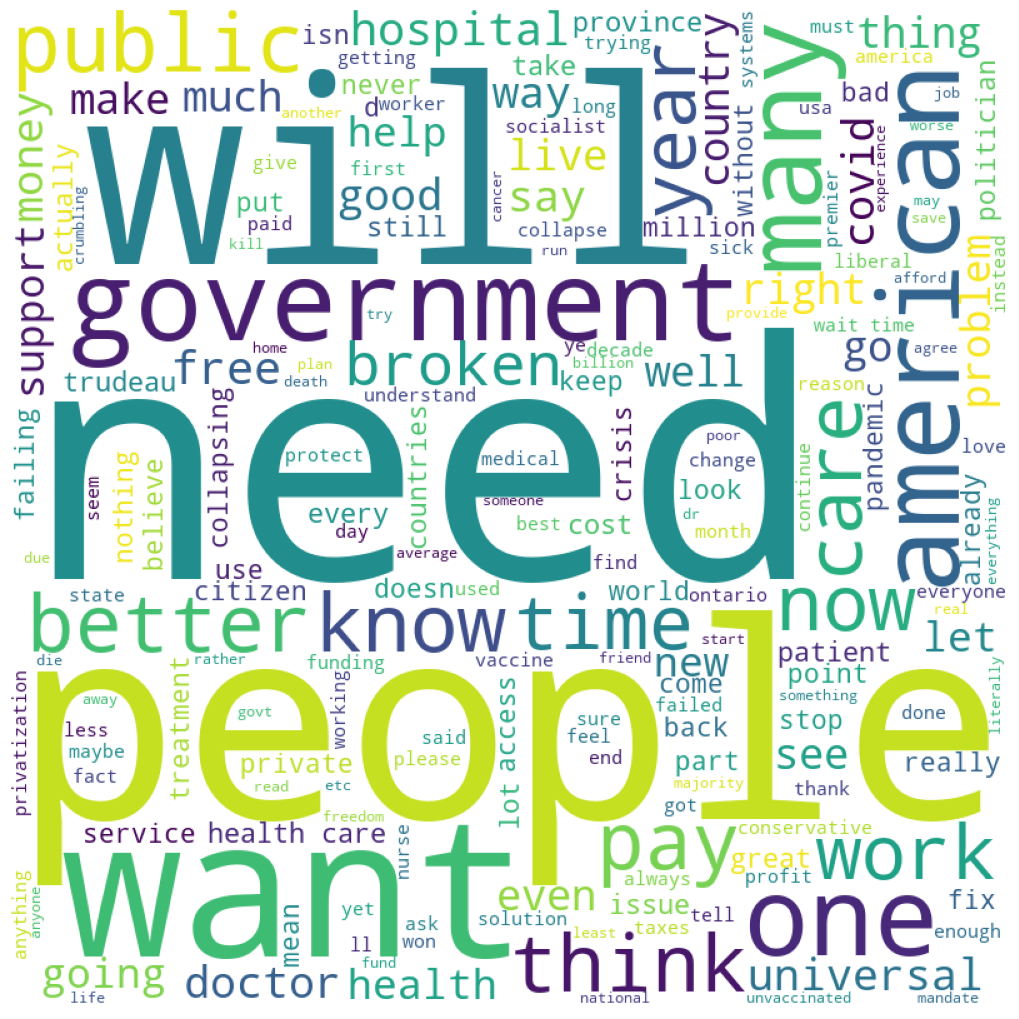

In [70]:
plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [71]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in df['cleaned_tweets']]

sentiment_objects[0].polarity, sentiment_objects[0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.125,
 TextBlob("bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills"))

In [72]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:99]


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.125,
  'bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills'],
 [0.16,
  'great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc'],
 [-0.2,
  'no i said i trying canadian culture partner canadian escaping taxes third world cbc obvious hit piece anything liberal green ndp they afraid obscure quebec parties'],
 [0.25,
  'wake people trudeaus spending left broke enough money one time one best world but hey lets keep voting narcissistic dictator nutjob back is every one brainwashed'],
 [0.0, 'let ask waiting line place stressed feel mass immigration'],
 [0.24333333333333332,
  'not sure jmac i canadian far fair perfect people wait months treatment need mri yet always overloaded needs money even though pay ridiculous taxes'],
 [0.0, 'on way canadian'],
 [0.06818181818181818,
  'well point i suggest take deep breat

In [73]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df
df['polarity'] = sentiment_df['polarity']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills,0.125,Positive
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc,0.160,Positive
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",no i said i trying canadian culture partner canadian escaping taxes third world cbc obvious hit piece anything liberal green ndp they afraid obscure quebec parties,-0.200,Negative
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[],wake people trudeaus spending left broke enough money one time one best world but hey lets keep voting narcissistic dictator nutjob back is every one brainwashed,0.250,Positive
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiti

In [75]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       1.250000e-01
1       1.600000e-01
2      -2.000000e-01
3       2.500000e-01
4       0.000000e+00
5       2.433333e-01
6       0.000000e+00
7       6.818182e-02
8       2.500000e-01
9      -1.666667e-01
10      2.872024e-01
11      1.428571e-01
12      3.500000e-01
13      3.050000e-01
14     -1.187500e-01
15      4.000000e-01
16      0.000000e+00
17      2.142857e-01
18      2.000000e-01
19     -2.500000e-01
20      1.666667e-01
21     -5.000000e-02
22     -5.000000e-02
23      0.000000e+00
24      0.000000e+00
25     -4.666667e-01
26      0.000000e+00
27      5.000000e-01
28      1.111111e-01
29     -6.938894e-18
30     -3.000000e-01
31      5.000000e-01
32      2.083333e-01
33      3.000000e-01
34      0.000000e+00
35      0.000000e+00
36      0.000000e+00
37      9.090909e-02
38      6.333333e-02
39     -1.178571e-01
40      4.166667e-01
41      1.000000e-01
42      3.071429e-01
43      0.000000e+00
44      1.000000e-01
45      0.000000e+00
46      1.821429e-01
47     -3.000

In [76]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

sentiment = []
# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        sentiment.append("Positive")
        pos=pos+1
    elif items<0:
        sentiment.append("Negative")
        neg=neg+1
    else:
        sentiment.append("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

4858 2903 2098


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
df['Sentiment'] = sentiment

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills,0.125,Positive
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc,0.160,Positive
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",no i said i trying canadian culture partner canadian escaping taxes third world cbc obvious hit piece anything liberal green ndp they afraid obscure quebec parties,-0.200,Negative
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,2023-02-11,22:48:25,11,2,2023,[],[],wake people trudeaus spending left broke enough money one time one best world but hey lets keep voting narcissistic dictator nutjob back is every one brainwashed,0.250,Positive
4,4,1.624530e+18,2023-02-11 22:01:30+00:00,B0Ghopper,@globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.,0,en,NaN,@globalnews let's ask all those canadians waiti

In [79]:
# df.to_csv('tweet_analysis_guitar.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
e_words= [i.strip().lower().split(' ') for i in df['cleaned_tweets']]


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
e_words[2]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['no',
 'i',
 'said',
 'i',
 'trying',
 'canadian',
 'culture',
 'partner',
 'canadian',
 'escaping',
 'taxes',
 'third',
 'world',
 'cbc',
 'obvious',
 'hit',
 'piece',
 'anything',
 'liberal',
 'green',
 'ndp',
 'they',
 'afraid',
 'obscure',
 'quebec',
 'parties']

In [82]:
list_words = []
lemmatizer = WordNetLemmatizer()

for s in e_words:
    word = []
    for w in s:
        rootWord=lemmatizer.lemmatize(w)
        word.append(rootWord)
    list_words.append(word)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
list_words[2]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['no',
 'i',
 'said',
 'i',
 'trying',
 'canadian',
 'culture',
 'partner',
 'canadian',
 'escaping',
 'tax',
 'third',
 'world',
 'cbc',
 'obvious',
 'hit',
 'piece',
 'anything',
 'liberal',
 'green',
 'ndp',
 'they',
 'afraid',
 'obscure',
 'quebec',
 'party']

In [84]:
df['words'] = list_words

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
df.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment,words
0,0,1.624560e+18,2023-02-11 23:45:44+00:00,lost_grrl,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,3,en,NaN,@Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...,1,2023-02-11,23:45:44,11,2,2023,[],"[Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]",bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills,0.125,Positive,"[bullshit, i, never, met, canadian, brit, willingly, trade, private, insurance, u, wait, see, doctor, canada, doesn, come, side, bankruptcy, i, health, insurance, med, bill]"
1,1,1.624550e+18,2023-02-11 23:32:45+00:00,KristyAmbrose1,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",2,en,NaN,"@tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under ""shit that never happened.""\n\n""third world healthcare system"" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, ""do you even GET the CBC?""",0,2023-02-11,23:32:45,11,2,2023,[],"[tomcollins80, EdtheSock, babsy1234]",great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc,0.160,Positive,"[great, story, brah, allow, file, shit, never, happened, third, world, and, much, your, medical, debt, no, way, canadian, said, i, repeat, even, get, cbc]"
2,2,1.624550e+18,2023-02-11 23:31:16+00:00,tomcollins80,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",2,en,NaN,"@KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.",0,2023-02-11,23:31:16,11,2,2023,[],"[KristyAmbrose1, EdtheSock, babsy1234]",no i said i trying canadian culture partner canadian escaping taxes third world cbc obvious hit piece anything liberal green ndp they afraid obscure quebec parties,-0.200,Negative,"[no, i, said, i, trying, canadian, culture, partner, canadian, escaping, tax, third, world, cbc, obvious, hit, piece, anything, liberal, green, ndp, they, afraid, obscure, quebec, party]"
3,3,1.624540e+18,2023-02-11 22:48:25+00:00,CanadianGirlw69,"https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?",1,en,NaN,"tiktok.com/@pierrepoiliev…\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic

In [86]:
# df_pos = df['Sentiment'].filter(like='Positive', axis=0)
df_pos = df.where(df["Sentiment"] == 'Positive')
df_pos.dropna(inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
df_pos.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,ID,Date,User,Tweet,replyCount,lang,Place,rendercontents,Like_Count,Dates,Time,day,month,year,Hashtags,mentions,cleaned_tweets,polarity,Sentiment,words
84,84.0,1.623760e+18,2023-02-09 19:13:58+00:00,jdouglaslittle,"Yes it's not enough but BOTH the provinces and feds have to put more on the table. Canadians dont want ""a healthcare system"" they want the worlds best system.\n\nTrudeau's health care offer not enough to address urgent issues in Alberta: critics\n\nhttps://t.co/8yFaOFEJdW",0.0,en,"Place(id='1e5cb4d0509db554', fullName='Vancouver, British Columbia', name='Vancouver', type='city', country='Canada', countryCode='CA')","Yes it's not enough but BOTH the provinces and feds have to put more on the table. Canadians dont want ""a healthcare system"" they want the worlds best system.\n\nTrudeau's health care offer not enough to address urgent issues in Alberta: critics\n\nflip.it/wsl1lY",0.0,2023-02-09,19:13:58,9.0,2.0,2023.0,[],[],yes enough both provinces feds put table canadians want want worlds best trudeau health care offer enough address urgent issues alberta critics,0.333333,Positive,"[yes, enough, both, province, fed, put, table, canadian, want, want, world, best, trudeau, health, care, offer, enough, address, urgent, issue, alberta, critic]"
748,748.0,1.618710e+18,2023-01-26 20:35:49+00:00,1NOnlyJGood,@sylvanlaketrev @RachelNotley everyone is. what really annoys me is when foreigners trash our Healthcare system in the states. yes Canadian Healthcare does have +'s. but the U.S. Healthcare system has its own equally great parts. Just mind your business and fix your own issue ms.,0.0,en,"Place(id='db6cee8d55fe4a29', fullName='Nashua, NH', name='Nashua', type='city', country='United States', countryCode='US')",@sylvanlaketrev @RachelNotley everyone is. what really annoys me is when foreigners trash our Healthcare system in the states. yes Canadian Healthcare does have +'s. but the U.S. Healthcare system has its own equally great parts. Just mind your business and fix your own issue ms.,0.0,2023-01-26,20:35:49,26.0,1.0,2023.0,[],"[sylvanlaketrev, RachelNotley]",everyone really annoys foreigners trash healthcare states yes canadian healthcare u s healthcare equally great parts just mind business fix issue ms,0.500000,Positive,"[everyone, really, annoys, foreigner, trash, healthcare, state, yes, canadian, healthcare, u, s, healthcare, equally, great, part, just, mind, business, fix, issue, m]"
805,805.0,1.618360e+18,2023-01-25 21:47:02+00:00,RickMenassa,"Very informative session for Canadian delegates with the @SaudiChambers, @SaudiMOH, Ministry of Investment, and the National Center for Privatization &amp; PPP where we learned about the Saudi #healthcare system, collaboration in #DigitalHealth and #investment opportunities. https://t.co/m2CeyW1zaS",0.0,en,"Place(id='07d9debc67086001', fullName='Council of Saudi Chambers | مجلس الغرف التجارية', name='Council of Saudi Chambers | مجلس الغرف التجارية', type='poi', country='Kingdom of Saudi Arabia', countryCode='SA')","Very informative session for Canadian delegates with the @SaudiChambers, @SaudiMOH, Ministry of Investment, and the National Center for Privatization &amp; PPP where we learned about the Saudi #healthcare system, collaboration in #DigitalHealth and #investment opportunities. https://t.co/m2CeyW1zaS",0.0,2023-01-25,21:47:02,25.0,1.0,2023.0,"[#healthcare, #DigitalHealth, #investment]","[SaudiChambers,, SaudiMOH,]",very informative session canadian delegates ministry investment national center privatization ppp learned saudi collaboration opportunities,0.050000,Positive,"[very, informative, session, canadian, delegate, ministry, investment, national, center, privatization, ppp, learned, saudi, collaboration, opportunity]"
826,826.0,1.618310e+18,2023-01-25 17:59:47+00:00,n8dawwggg,@JustinTrudeau Key point of this statement:\n\n“Canadians expect and\ndeserve the best care possible.”\n\nZero mention of the words ‘public’ or ‘private’. Healthcare is up to t

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


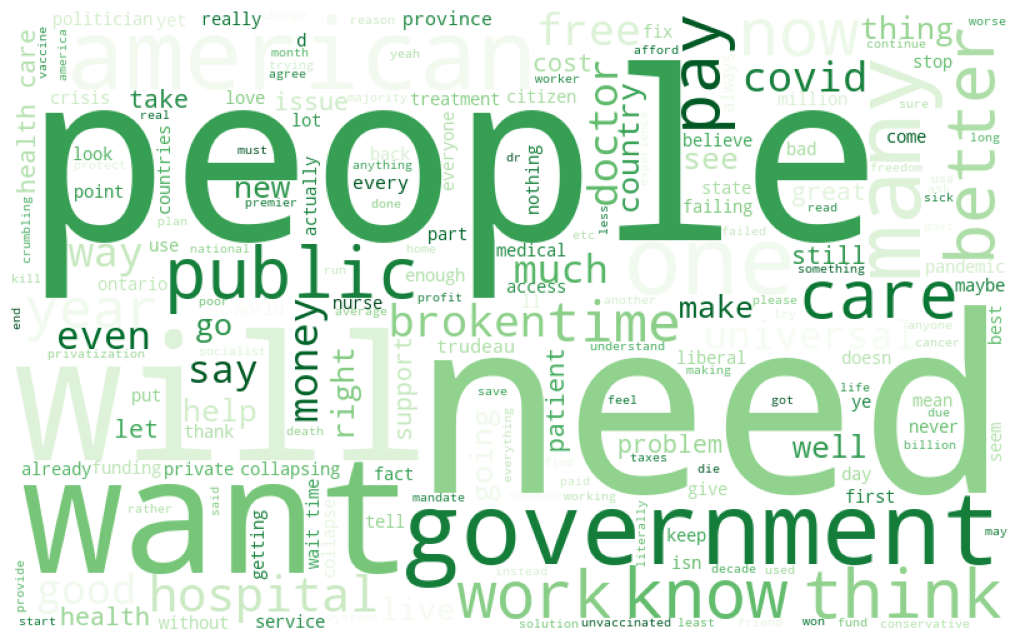

In [88]:
for val in df_pos['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Greens',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


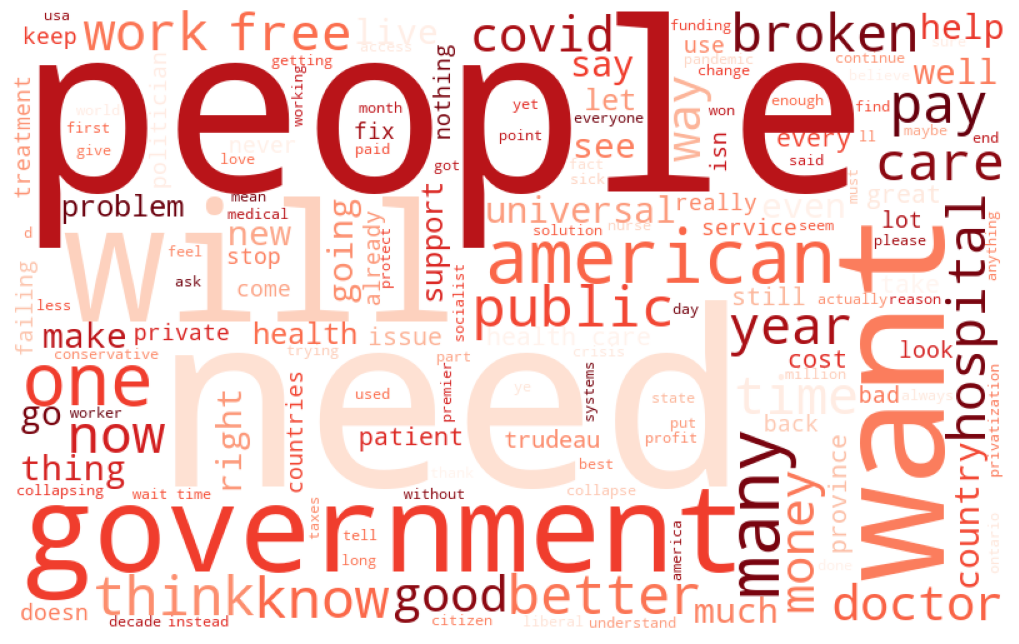

In [89]:
# df_pos = df['Sentiment'].filter(like='Positive', axis=0)
df_neg = df.where(df["Sentiment"] == 'Negative')
df_neg.dropna(inplace = True)

for val in df_neg['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Reds',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [90]:
corpus=[]
a=[]
for i in range(len(df['words'])):
        a=df['words'][i]

        corpus.append(' '.join(a))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
corpus[0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'bullshit i never met canadian brit willingly trade private insurance u wait see doctor canada doesn come side bankruptcy i health insurance med bill'

In [92]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T" will be used to save temporary dictionary and corpus.


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
texts = df['words']

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-02-13 19:05:49,953 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2023-02-13 19:05:50,339 : INFO : built Dictionary(12510 unique tokens: ['bankruptcy', 'bill', 'brit', 'bullshit', 'canada']...) from 9859 documents (total 173088 corpus positions)
2023-02-13 19:05:50,340 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12510 unique tokens: ['bankruptcy', 'bill', 'brit', 'bullshit', 'canada']...) from 9859 documents (total 173088 corpus positions)", 'datetime': '2023-02-13T19:05:50.340581', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x

In [98]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-02-13 19:06:06,302 : INFO : storing corpus in Matrix Market format to /var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.mm
2023-02-13 19:06:06,321 : INFO : saving sparse matrix to /var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.mm
2023-02-13 19:06:06,328 : INFO : PROGRESS: saving document #0
2023-02-13 19:06:06,401 : INFO : PROGRESS: saving document #1000
2023-02-13 19:06:06,444 : INFO : PROGRESS: saving document #2000
2023-02-13 19:06:06,483 : INFO : PROGRESS: saving document #3000
2023-02-13 19:06:06,522 : INFO : PROGRESS: saving document #4000
2023-02-13 19:06:06,562 : INFO : PROGRESS: saving document #5000
2023-02-1

In [99]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-02-13 19:06:12,233 : INFO : collecting document frequencies
2023-02-13 19:06:12,237 : INFO : PROGRESS: processing document #0
2023-02-13 19:06:12,372 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 9859 documents and 12510 features (164120 matrix non-zeros)', 'datetime': '2023-02-13T19:06:12.372714', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [100]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
total_topics = 5


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-02-13 19:06:26,522 : INFO : using symmetric alpha at 0.2
2023-02-13 19:06:26,527 : INFO : using symmetric eta at 0.2
2023-02-13 19:06:26,531 : INFO : using serial LDA version on this node
2023-02-13 19:06:26,543 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 9859 documents, updating model once every 2000 documents, evaluating perplexity every 9859 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-13 19:06:26,545 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-02-13 1

In [103]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.043*"canadian" + 0.012*"it" + 0.011*"the" + 0.007*"health" + 0.007*"government"'),
 (1,
  '0.055*"canadian" + 0.021*"i" + 0.008*"many" + 0.007*"covid" + 0.007*"people"'),
 (2,
  '0.058*"canadian" + 0.027*"i" + 0.019*"healthcare" + 0.009*"the" + 0.009*"care"'),
 (3,
  '0.055*"canadian" + 0.013*"the" + 0.011*"people" + 0.010*"i" + 0.009*"american"'),
 (4,
  '0.056*"canadian" + 0.026*"i" + 0.019*"the" + 0.014*"canada" + 0.010*"government"')]

In [104]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 67)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
df_lda.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,canadian,it,the,health,government,people,need,year,we,healthcare,life,work,care,i,support,vaccinated,trudeau,our,cost,nurse,pandemic,will,hospital,you,overwhelmed,many,covid,u,2,american,time,canada,1,doctor,pay,vaccine,one,want,tax,long,mandate,system,free,a,see,right,wait,much,now,better,country,go,public,world,medical,this,universal,private,so,and,thing,take,problem,never,good,if,know
0,0.042742,0.011751,0.011055,0.006885,0.006612,0.006564,0.006409,0.005145,0.005040,0.004854,0.004461,0.004422,0.004360,0.004087,0.003862,0.003751,0.003638,0.003638,0.003314,0.00317,0.003146,0.003019,0.002910,0.002907,0.002887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
1,0.055014,0.003477,0.000000,0.004129,0.000000,0.007294,0.000000,0.000000,0.004680,0.006439,0.003548,0.000000,0.000000,0.021010,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.004857,0.000000,0.000000,0.008221,0.007491,0.007266,0.006452,0.005559,0.005242,0.004932,0.004691,0.004633,0.004496,0.004289,0.004146,0.004089,0.003935,0.00373,0.003612,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
2,0.058267,0.003673,0.008610,0.004715,0.000000,0.005957,0.008057,0.005726,0.005186,0.019256,0.000000,0.000000,0.008512,0.026838,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.004446,0.000000,0.006339,0.000000,0.000000,0.000000,0.003464,0.000000,0.003395,0.005743,0.008122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00807,0.004533,0.004339,0.004178,0.003933,0.003705,0.003666,0.003613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
3,0.054890,0.005703,0.013419,0.000000,0.000000,0.010643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010051,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.006096,0.000000,0.000000,0.000000,0.000000,0.000000,0.008240,0.000000,0.008895,0.000000,0.008228,0.000000,0.000000,0.004550,0.000000,0.003993,0.007862,0.000000,0.00000,0.000000,0.00000,0.000000,0.003931,0.000000,0.000000,0.000000,0.000000,0.004377,0.007451,0.005816,0.005787,0.005259,0.004948,0.004758,0.004604,0.004369,0.004357,0.004148,0.004004,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
4,0.055636,0.005687,0.018835,0.008122,0.010156,0.000000,0.006649,0.004003,0.000000,0.003209,0.000000,0.003785,0.007411,0.026106,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.008234,0.000000,0.000000,0.000000,0.000000,0.000000,0.004803,0.000000,0.000000,0.000000,0.014091,0.000000,0.000000,0.000000,0.000000,0.006013,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.003213,0.000000,0.000000,0.000000,0.000000,0.003153,0.000000,0.004225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00458,0.004117,0.00356,0.003553,0.003545,0.00346,0.003021


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


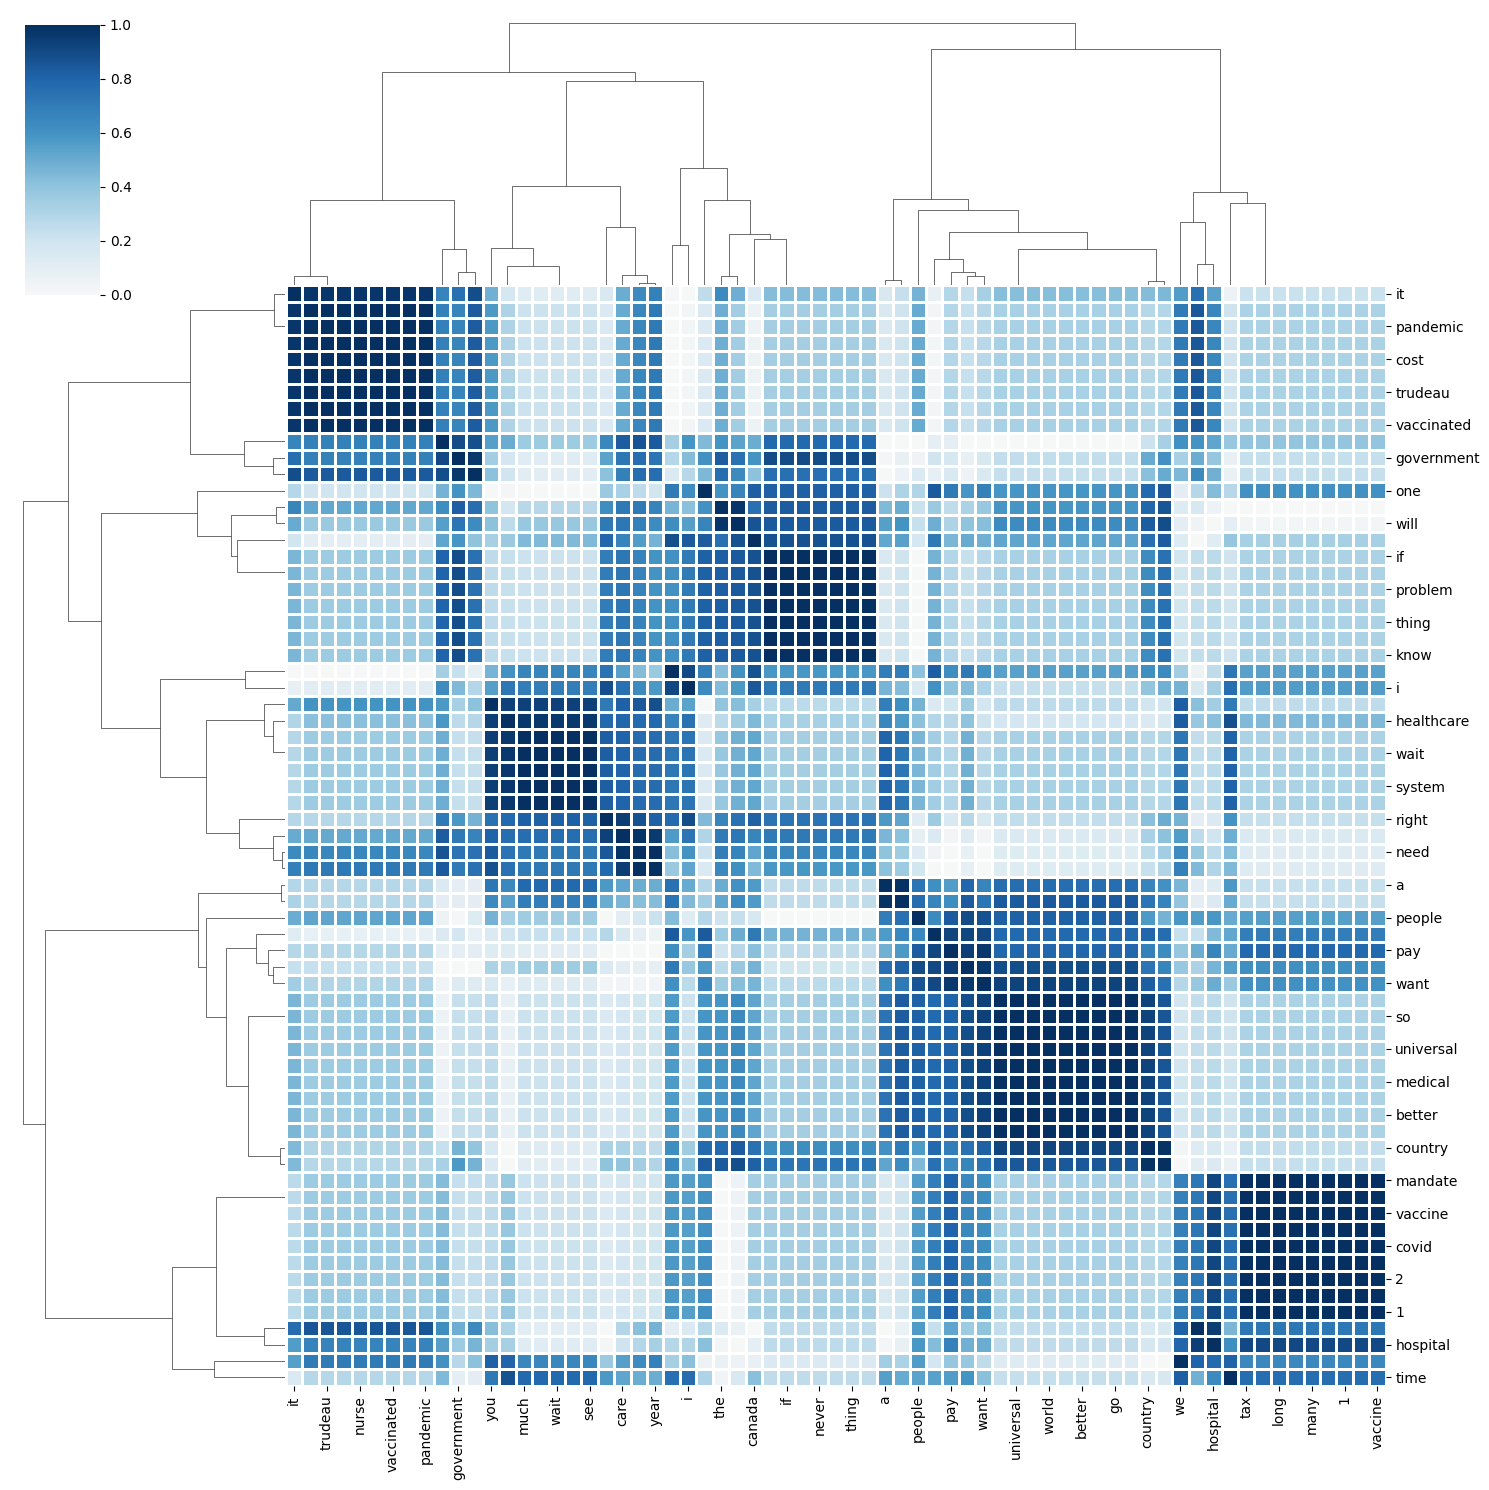

In [107]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [108]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  32.426648
1       51.163364 -159.968018       2        1  24.514332
3      -73.144554   21.523815       3        1  17.282061
2      -66.410133 -110.606438       4        1  15.681233
0       54.417324   12.443444       5        1  10.095727, topic_info=                  Term        Freq       Total Category  logprob  loglift
5             canadian  536.000000  536.000000  Default  30.0000  30.0000
113         healthcare   66.000000   66.000000  Default  29.0000  29.0000
136                the  115.000000  115.000000  Default  28.0000  28.0000
182                 it   53.000000   53.000000  Default  27.0000  27.0000
10                   i  196.000000  196.000000  Default  26.0000  26.0000
131         government   47.000000   47.000000  Default  25.0000  25.0000
77              people   55.000000   55.000000  Default  24.0000  24.0000
146             system   23.000000   23.000000  Default  23.0000  23.0000
2121        vaccinated   10.000000   10.000000  Default  22.0000  22.0000
924           american   39.000000   39.000000  Default  21.0000  21.0000
9               health   51.000000   51.000000  Default  20.0000  20.0000
97                need   52.000000   52.000000  Default  19.0000  19.0000
3827      unvaccinated    9.000000    9.000000  Default  18.0000  18.0000
1441           vaccine   12.000000   12.000000  Default  17.0000  17.0000
408               care   52.000000   52.000000  Default  16.0000  16.0000
1163           measure    5.000000    5.000000  Default  15.0000  15.0000
347             better   31.000000   31.000000  Default  14.0000  14.0000
1407             nurse   12.000000   12.000000  Default  13.0000  13.0000
267                  2   23.000000   23.000000  Default  12.0000  12.0000
308                you   28.000000   28.000000  Default  11.0000  11.0000
430              covid   32.000000   32.000000  Default  10.0000  10.0000
19                   u   52.000000   52.000000  Default   9.0000   9.0000
365               want   37.000000   37.000000  Default   8.0000   8.0000
197               life   22.000000   22.000000  Default   7.0000   7.0000
857            federal    8.000000    8.000000  Default   6.0000   6.0000
129                 go   22.000000   22.000000  Default   5.0000   5.0000
79                time   31.000000   31.000000  Default   4.0000   4.0000
140               year   38.000000   38.000000  Default   3.0000   3.0000
32             medical   19.000000   19.000000  Default   2.0000   2.0000
58                they   14.000000   14.000000  Default   1.0000   1.0000
1046        importance    2.770538    2.809966   Topic1  -7.0509   1.1121
1933         addiction    2.545793    2.585791   Topic1  -7.1355   1.1106
3545         provision    2.404776    2.444906   Topic1  -7.1925   1.1096
2441           whether    2.616876    2.661681   Topic1  -7.1080   1.1092
5247            severe    2.304176    2.348429   Topic1  -7.2352   1.1072
3161          campaign    2.583148    2.640798   Topic1  -7.1209   1.1041
1648             angry    1.905768    1.948783   Topic1  -7.4251   1.1039
5649           symptom    2.321552    2.374041   Topic1  -7.2277   1.1038
5340         criticize    1.691271    1.731385   Topic1  -7.5445   1.1027
1913               wtf    1.587798    1.628270   Topic1  -7.6076   1.1010
393               cold    1.517234    1.557412   Topic1  -7.6531   1.1001
5358         therapist    1.480456    1.520131   Topic1  -7.6776   1.0997
2154           virtual    1.431289    1.471458   Topic1  -7.7114   1.0985
1187         yesterday    1.435113    1.475692   Topic1  -7.7087   1.0983
2723         attention    3.206424    3.301761   Topic1  -6.9048   1.0969
3079             voice    1.479422    1.523961   Topic1  -7.6783   1.0965
3444          ensuring    1.329233    1.370036   Topic1  -7.7853   1.0960